# Results graph analysis

The main purpose of this notebook is to draw some graphs in order to analyse the data obtained from running the prediction on different devices.

In [334]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
# Ruta a la carpeta principal que contiene todas las subcarpetas
root_dir = 'results'

# Datos

## Carga del modelo

In [336]:
# Lista para almacenar los datos
data = []

# Recorrer todas las subcarpetas y archivos en la carpeta root_dir
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.json'):
            # Construir la ruta completa al archivo json
            file_path = os.path.join(subdir, file)
            
            # Extraer device y precision del nombre del archivo
            parts = file.split('_')
            device, precision = parts[3], parts[1]
            

            # Leer el archivo JSON
            with open(file_path, 'r') as f:
                json_data = json.load(f)


            data.append({'Device': parts[3], 'Precision': parts[1],
                         'Avg CPU (%)': json_data['Load model']['Avg CPU'],
                         'Std dev CPU (%)': json_data['Load model']['Std dev CPU'],
                         'Max memory (%)': json_data['Load model']['Max memory'],
                         'Time (s)': json_data['Load model']['Load time'],
                         }) # 'Total execution time': json_data['total execution time']
        

# Crear un DataFrame con los datos recopilados
load_model_df = pd.DataFrame(data)
# Creamos un ID para las precisiones y así poder plotear con el mismo color cada una de ellas.
load_model_df['ID Precision'] = load_model_df['Precision'].map({'INT8': 1, 'FP16': 2, 'FP32': 3})
load_model_df.head()

# load_model_df.to_csv('load_model_df.csv', index=False)

,Device,Precision,Avg CPU (%),Std dev CPU (%),Max memory (%),Time (s),ID Precision
0,RPi3B,FP32,4.35,6.151829,43.1,0.751377,3
1,Rock-USBCoral,INT8,0.00,0.000000,20.0,2.743685,1
2,Rock4Plus,FP16,13.30,0.000000,18.5,0.250683,2
3,Rock4Plus,INT8,50.00,0.000000,18.9,0.095555,1
4,RPi4B,FP32,4.70,0.000000,13.9,0.370808,3


## Inferencia

Observamos los datos resultantes de la totatiladad de la inferencia

In [337]:
# Lista para almacenar los datos
data = []

# Recorrer todas las subcarpetas y archivos en la carpeta root_dir
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.json'):
            # Construir la ruta completa al archivo json
            file_path = os.path.join(subdir, file)
            
            # Extraer device y precision del nombre del archivo
            parts = file.split('_')
            device, precision = parts[3], parts[1]
            

            # Leer el archivo JSON
            with open(file_path, 'r') as f:
                json_data = json.load(f)



            # Variables para acumular los valores y contar las entradas
            total_time = 0
            total_avg_cpu = 0
            total_std_dev_cpu = 0
            total_max_memory = 0
            count = 0

            # Iterar sobre cada elemento en el diccionario
            for key, value in json_data.items():
                if isinstance(value, dict) and "Time" in value and "Avg CPU" in value:
                    total_time += value["Time"]
                    total_avg_cpu += value["Avg CPU"]
                    total_std_dev_cpu += value["Std dev CPU"]
                    total_max_memory += value["Max memory"]
                    count += 1

            # Calcular promedios y guardarlos
            data.append({'Device': parts[3], 'Precision': parts[1],
                         'Avg time (s)': total_time / count,
                         'Avg avg CPU (%)': total_avg_cpu / count,
                         'Avg std dev CPU (%)': total_std_dev_cpu / count,
                         'Avg max memory (%)': total_max_memory / count,
                         })
        

# Crear un DataFrame con los datos recopilados
inference_df = pd.DataFrame(data)
# Creamos un ID para las precisiones y así poder plotear con el mismo color cada una de ellas.
inference_df['ID Precision'] = inference_df['Precision'].map({'INT8': 1, 'FP16': 2, 'FP32': 3})
inference_df.head()

# inference_df.to_csv('inference_df.csv', index=False)

,Device,Precision,Avg time (s),Avg avg CPU (%),Avg std dev CPU (%),Avg max memory (%),ID Precision
0,RPi3B,FP32,3.197144,26.367187,2.277776,61.22,3
1,Rock-USBCoral,INT8,0.123112,17.220000,3.846661,22.70,1
2,Rock4Plus,FP16,1.091000,22.562273,7.219165,22.88,2
3,Rock4Plus,INT8,1.078759,17.963788,2.837770,23.18,1
4,RPi4B,FP32,0.923772,27.351556,5.794889,14.98,3


# Gráficos

## Tiempos

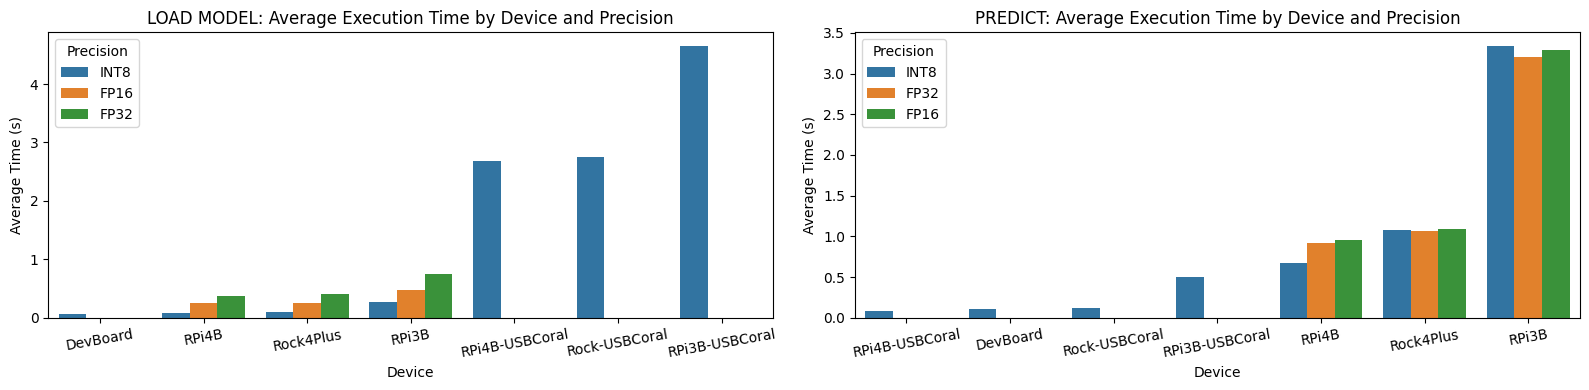

In [338]:
# Crear una figura con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Gráfico para la carga del modelo
sns.barplot(x="Device", y="Time (s)", hue="Precision", data=load_model_df.sort_values(by=['Time (s)','ID Precision'], ascending=[True, True]), ax=axes[0])
axes[0].set_title("LOAD MODEL: Average Execution Time by Device and Precision")
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=10)
axes[0].set_xlabel("Device")
axes[0].set_ylabel("Average Time (s)")
axes[0].legend(title="Precision")

# Gráfico para la predicción
sns.barplot(x="Device", y="Avg time (s)", hue="Precision", data=inference_df.sort_values(by=['Avg time (s)','ID Precision'], ascending=[True, True]), ax=axes[1])
axes[1].set_title("PREDICT: Average Execution Time by Device and Precision")
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=10)
axes[1].set_xlabel("Device")
axes[1].set_ylabel("Average Time (s)")
axes[1].legend(title="Precision")

# Mostrar la figura completa
plt.tight_layout()
plt.show()

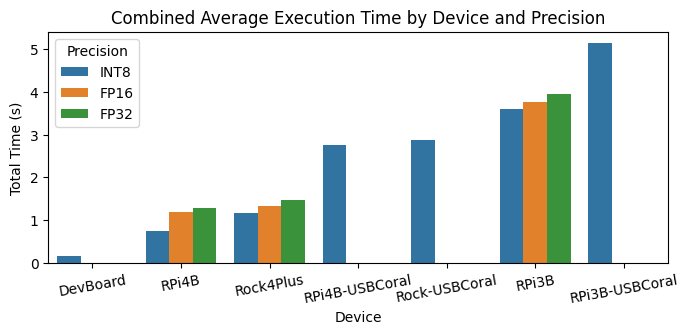

In [339]:
load_model_df_copy = load_model_df.copy()
inference_df_copy = inference_df.copy()
# Paso 1: Renombrar las columnas de tiempo para mantenerlas diferenciadas
load_model_df_copy.rename(columns={'Time (s)': 'Load Time (s)'}, inplace=True)
inference_df_copy.rename(columns={'Avg time (s)': 'Predict Time (s)'}, inplace=True)

# Paso 2: Combinar los DataFrames basándose en 'Device' y 'Precision'
combined_df = pd.merge(load_model_df_copy, inference_df_copy, on=['Device', 'Precision', 'ID Precision'])

# Paso 3: Crear una nueva columna que sea la suma de los tiempos de carga y predicción
combined_df['Total Time (s)'] = combined_df['Load Time (s)'] + combined_df['Predict Time (s)']

# Paso 4: Crear la visualización
plt.figure(figsize=(8, 3))
sns.barplot(x="Device", y="Total Time (s)", hue="Precision", data=combined_df.sort_values(by=['Total Time (s)','ID Precision'], ascending=[True, True]))
plt.title("Combined Average Execution Time by Device and Precision")
plt.xticks(rotation=10)
plt.xlabel("Device")
plt.ylabel("Total Time (s)")
plt.legend(title="Precision")
plt.show()

## Memoría

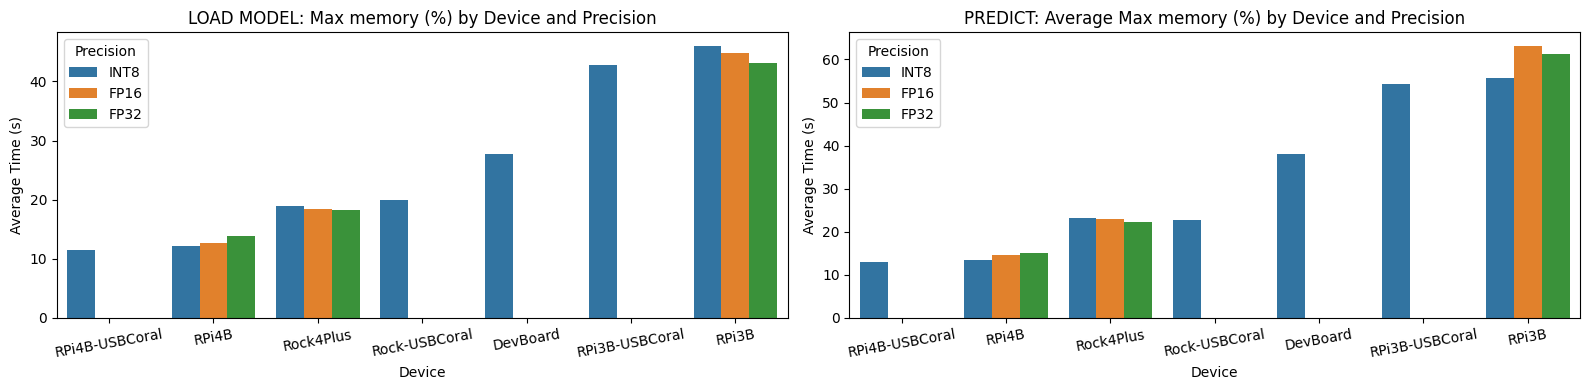

In [340]:
# Crear una figura con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Gráfico para la carga del modelo
sns.barplot(x="Device", y="Max memory (%)", hue="Precision", data=load_model_df.sort_values(by=['Max memory (%)','ID Precision'], ascending=[True, True]), ax=axes[0])
axes[0].set_title("LOAD MODEL: Max memory (%) by Device and Precision")
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=10)
axes[0].set_xlabel("Device")
axes[0].set_ylabel("Average Time (s)")
axes[0].legend(title="Precision")

# Gráfico para la predicción
sns.barplot(x="Device", y="Avg max memory (%)", hue="Precision", data=inference_df.sort_values(by=['Avg max memory (%)','ID Precision'], ascending=[True, True]), ax=axes[1])
axes[1].set_title("PREDICT: Average Max memory (%) by Device and Precision")
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=10)
axes[1].set_xlabel("Device")
axes[1].set_ylabel("Average Time (s)")
axes[1].legend(title="Precision")

# Mostrar la figura completa
plt.tight_layout()
plt.show()

## CPU

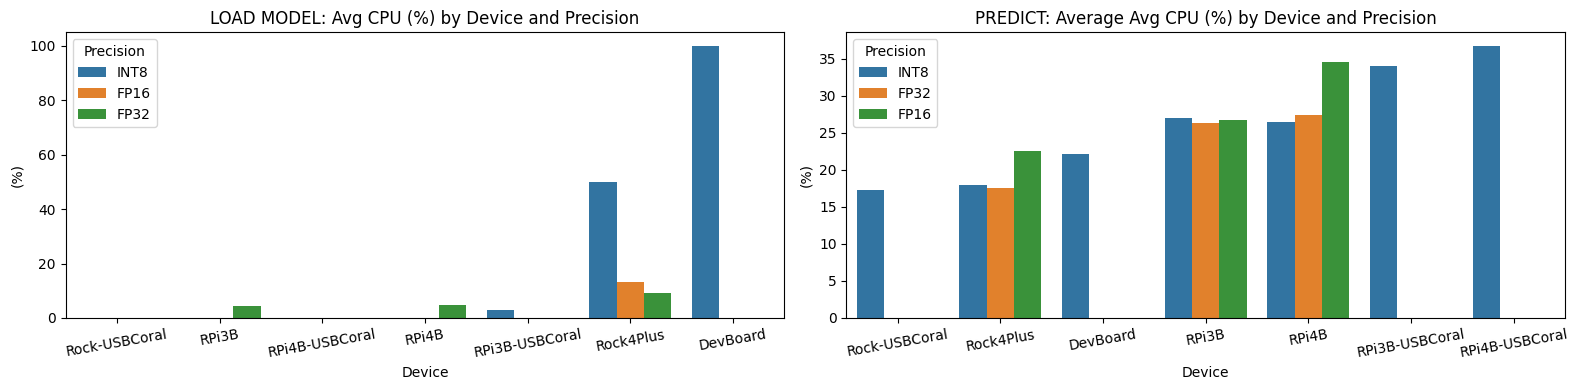

In [341]:
# Crear una figura con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Gráfico para la carga del modelo
sns.barplot(x="Device", y="Avg CPU (%)", hue="Precision", data=load_model_df.sort_values(by=['Avg CPU (%)','ID Precision'], ascending=[True, True]), ax=axes[0])
axes[0].set_title("LOAD MODEL: Avg CPU (%) by Device and Precision")
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=10)
axes[0].set_xlabel("Device")
axes[0].set_ylabel("(%)")
axes[0].legend(title="Precision")

# Gráfico para la predicción
sns.barplot(x="Device", y="Avg avg CPU (%)", hue="Precision", data=inference_df.sort_values(by=['Avg avg CPU (%)','ID Precision'], ascending=[True, True]), ax=axes[1])
axes[1].set_title("PREDICT: Average Avg CPU (%) by Device and Precision")
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=10)
axes[1].set_xlabel("Device")
axes[1].set_ylabel("(%)")
axes[1].legend(title="Precision")

# Mostrar la figura completa
plt.tight_layout()
plt.show()

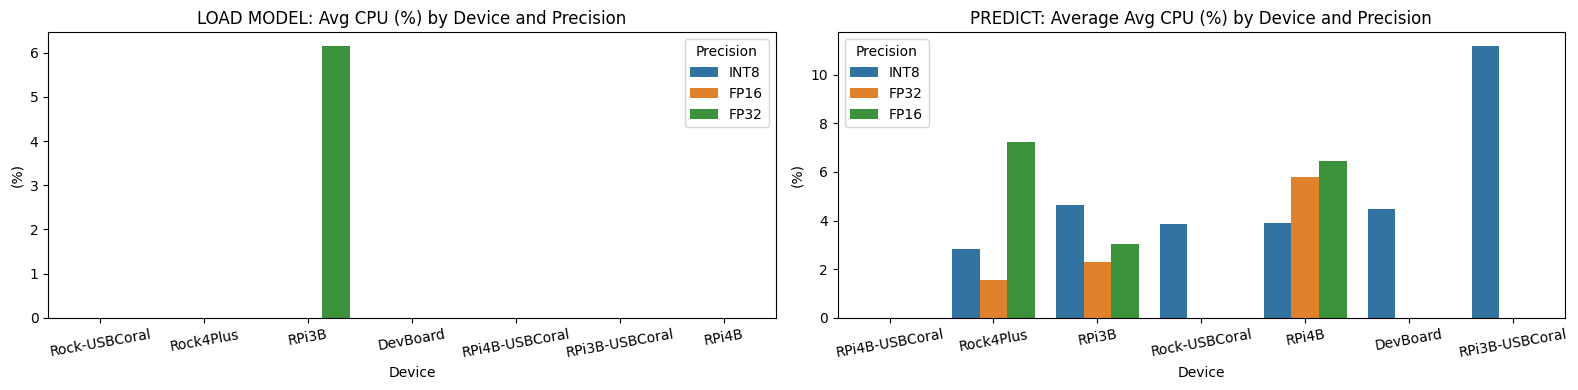

In [342]:
# Crear una figura con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Gráfico para la carga del modelo
sns.barplot(x="Device", y="Std dev CPU (%)", hue="Precision", data=load_model_df.sort_values(by=['Std dev CPU (%)','ID Precision'], ascending=[True, True]), ax=axes[0])
axes[0].set_title("LOAD MODEL: Avg CPU (%) by Device and Precision")
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=10)
axes[0].set_xlabel("Device")
axes[0].set_ylabel("(%)")
axes[0].legend(title="Precision")

# Gráfico para la predicción
sns.barplot(x="Device", y="Avg std dev CPU (%)", hue="Precision", data=inference_df.sort_values(by=['Avg std dev CPU (%)','ID Precision'], ascending=[True, True]), ax=axes[1])
axes[1].set_title("PREDICT: Average Avg CPU (%) by Device and Precision")
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=10)
axes[1].set_xlabel("Device")
axes[1].set_ylabel("(%)")
axes[1].legend(title="Precision")

# Mostrar la figura completa
plt.tight_layout()
plt.show()